In [26]:
#Carregar e Explorar os Dados
#Objetivo: Compreender a estrutura e o conteúdo dos dados, verificar a qualidade e identificar variáveis-chave.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
data = pd.read_excel('C:/Users/pedro/Documents/DADOS/Analise IFood GPT/analise_logistica.xlsx')

# Visualizar as primeiras linhas para entender as variáveis
print(data.head())

# Verificar informações básicas, como tipos de dados e valores ausentes
print(data.info())
print(data.describe())


   id_cliente       nome  idade genero          cidade data_adesao_clube  \
0           1  Cliente_1     58      F       São Paulo        2022-07-30   
1           2  Cliente_2     25      F        Salvador        2020-05-10   
2           3  Cliente_3     19      F       São Paulo        2021-09-29   
3           4  Cliente_4     65      F        Salvador        2021-06-30   
4           5  Cliente_5     35      M  Rio de Janeiro        2020-01-28   

    ano  mês  mes_ano plano_clube  ...  visitas  cancelamentos genero.1  \
0  2022    7  2022-07     Premium  ...        0              0        F   
1  2020    5  2020-05     Premium  ...        0              0        F   
2  2021    9  2021-09      Básico  ...        3              0        F   
3  2021    6  2021-06      Básico  ...        0              0        F   
4  2020    1  2020-01     Premium  ...        0              0        M   

         cidade.1  classificacao_idade  classificação_regiao  \
0       São Paulo           

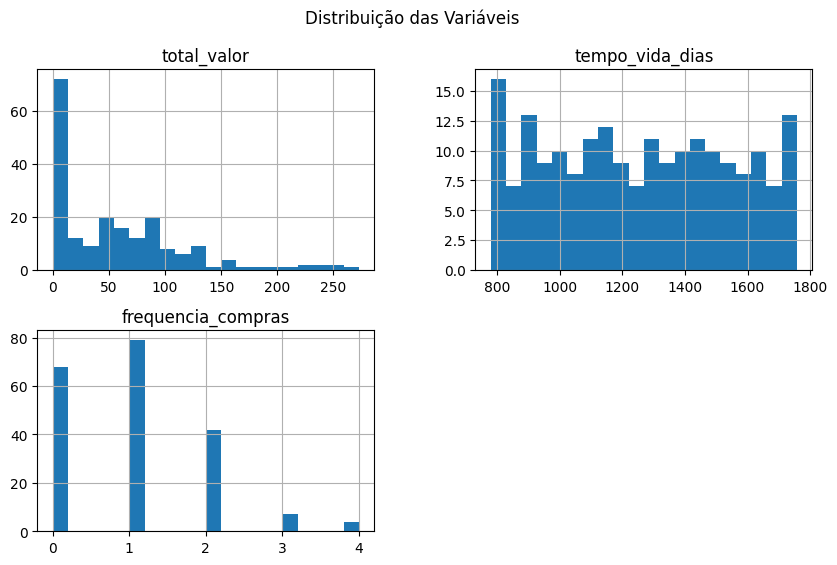

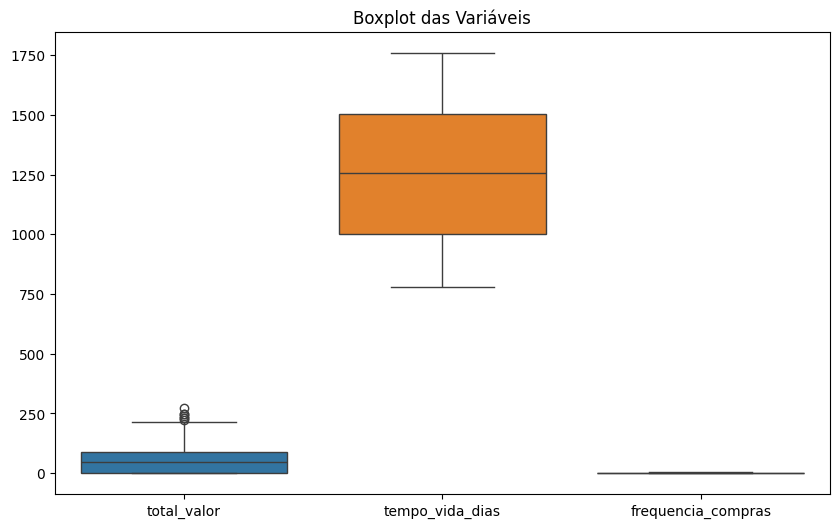

In [27]:
# Análise Descritiva
# Objetivo: Obter uma visão geral das variáveis numéricas e categóricas. Isso ajuda a identificar padrões, como a média de valor gasto, frequência de compras e tempo de vida médio dos clientes.

# Histograma de cada variável para entender sua distribuição
data[['total_valor', 'tempo_vida_dias', 'frequencia_compras']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribuição das Variáveis')
plt.show()

# Boxplot para identificar outliers e entender a variabilidade
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['total_valor', 'tempo_vida_dias', 'frequencia_compras']])
plt.title('Boxplot das Variáveis')
plt.show()


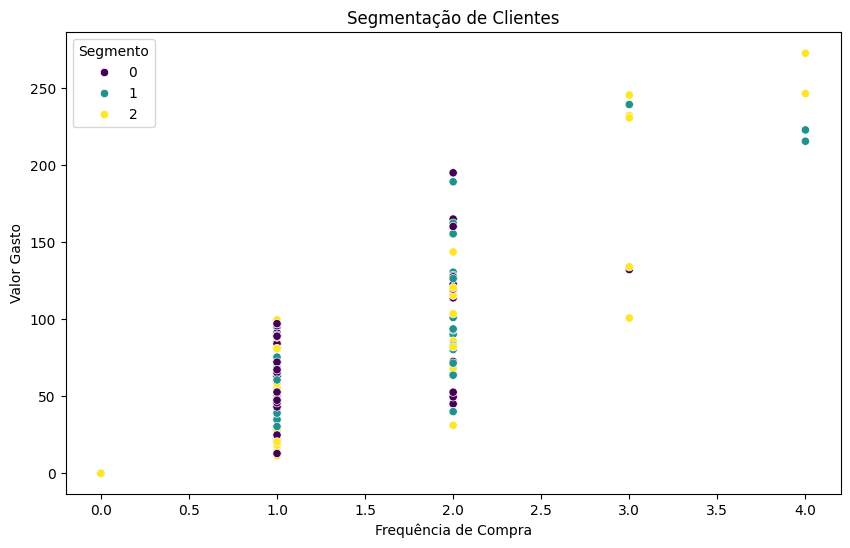

In [28]:
#Análise de Segmentação (Clustering)
#Objetivo: Identificar grupos de clientes com comportamentos semelhantes que podem ter diferentes potenciais de crescimento. Cada segmento pode ter oportunidades específicas para estratégias de crescimento.

from sklearn.cluster import KMeans

# Selecionar variáveis para segmentação
features = data[['total_valor', 'tempo_vida_dias', 'frequencia_compras']]

# Aplicar o K-Means para criar 3 segmentos
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segmento'] = kmeans.fit_predict(features)

# Visualizar os clusters em 2D (exemplo: valor_gasto vs frequencia_compra)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequencia_compras', y='total_valor', hue='Segmento', data=data, palette='viridis')
plt.title('Segmentação de Clientes')
plt.xlabel('Frequência de Compra')
plt.ylabel('Valor Gasto')
plt.legend(title='Segmento')
plt.show()

Valor Médio do Cliente (LTV): 4372.083953333334


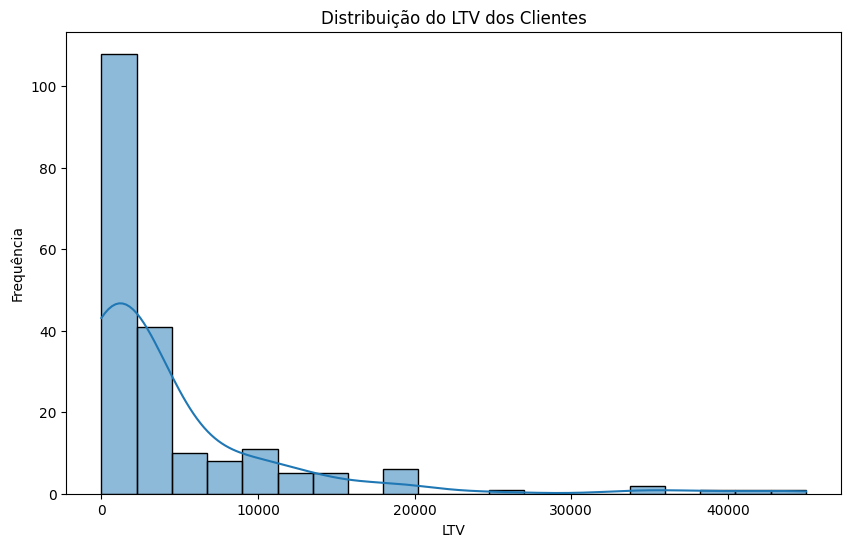

Taxa de Churn: 0.33
Taxa de Churn por Segmento:
Segmento
0    0.328358
1    0.342857
2    0.317460
Name: cancelamentos, dtype: float64


In [29]:
#Análise de Valor do Cliente (LTV - Lifetime Value)
#Objetivo: Calcular o LTV para identificar clientes de alto valor que poderiam ser alvo de estratégias de retenção ou crescimento.

# Calcular o LTV básico: valor gasto médio x frequência de compra x tempo de vida médio (em meses)
data['LTV'] = data['total_valor'] * data['frequencia_compras'] * (data['tempo_vida_dias'] / 30)
print("Valor Médio do Cliente (LTV):", data['LTV'].mean())

# Visualizar a distribuição do LTV
plt.figure(figsize=(10, 6))
sns.histplot(data['LTV'], bins=20, kde=True)
plt.title('Distribuição do LTV dos Clientes')
plt.xlabel('LTV')
plt.ylabel('Frequência')
plt.show()

# Exemplo de taxa de retenção
# Aqui você precisa de uma variável binária indicando se o cliente fez uma nova compra (retenção) ou não (churn).
# Vamos assumir que temos uma coluna 'churn' (0 - ativo, 1 - churn).

# Calcular a taxa de churn
churn_rate = data['cancelamentos'].mean()
print("Taxa de Churn:", churn_rate)

# Visualizar a taxa de churn por segmento
churn_by_segment = data.groupby('Segmento')['cancelamentos'].mean()
print("Taxa de Churn por Segmento:")
print(churn_by_segment)

In [30]:
# Análise de Cross-Selling e Up-Selling
# Objetivo: Identificar produtos ou serviços adicionais que poderiam ser oferecidos para aumentar o ticket médio dos clientes.
# Ferramentas: Se os dados incluem compras por categoria ou tipo de produto, você pode identificar padrões de compra e produtos populares.

# Exemplo: Calcular valor médio gasto por segmento e frequência de compra
# (necessário que haja uma coluna de 'categoria' ou similar)
gasto_por_segmento = data.groupby('Segmento')['total_valor'].mean()
frequencia_por_segmento = data.groupby('Segmento')['frequencia_compras'].mean()

print("Gasto Médio por Segmento:")
print(gasto_por_segmento)
print("\nFrequência de Compra por Segmento:")
print(frequencia_por_segmento)


Gasto Médio por Segmento:
Segmento
0    51.155672
1    61.605571
2    53.151270
Name: total_valor, dtype: float64

Frequência de Compra por Segmento:
Segmento
0    0.910448
1    1.085714
2    1.000000
Name: frequencia_compras, dtype: float64


In [31]:
# Exploração de Oportunidades de Aquisição de Novos Clientes
# Objetivo: Entender os perfis dos clientes atuais de alto valor para orientar estratégias de marketing e aquisição de novos clientes.

# Analisar o perfil dos clientes de maior valor
clientes_alto_valor = data[data['LTV'] > data['LTV'].quantile(0.75)]
print("Perfil dos Clientes de Alto Valor:")
print(clientes_alto_valor.describe())

Perfil dos Clientes de Alto Valor:
       id_cliente      idade    data_adesao_clube          ano        mês  \
count   50.000000  50.000000                   50    50.000000  50.000000   
mean   108.480000  42.320000  2021-03-14 03:50:24  2020.720000   6.320000   
min     12.000000  18.000000  2020-01-13 00:00:00  2020.000000   1.000000   
25%     65.250000  30.250000  2020-06-05 00:00:00  2020.000000   4.000000   
50%    100.500000  41.000000  2020-12-10 12:00:00  2020.000000   6.000000   
75%    158.250000  56.000000  2021-12-04 12:00:00  2021.000000   9.000000   
max    195.000000  65.000000  2022-09-15 00:00:00  2022.000000  12.000000   
std     54.008027  14.587442                  NaN     0.833973   3.334666   

       tempo_vida  tempo_vida_dias ultima_data_transacao  frequencia_compras  \
count   50.000000        50.000000                    50            50.00000   
mean     1.940000      1329.840000   2023-08-06 22:04:48             2.22000   
min      0.000000       780.000

C:\Users\pedro\AppData\Local\Temp\ipykernel_4288\2811951424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento', y='LTV', data=data, palette='viridis',legend=False)


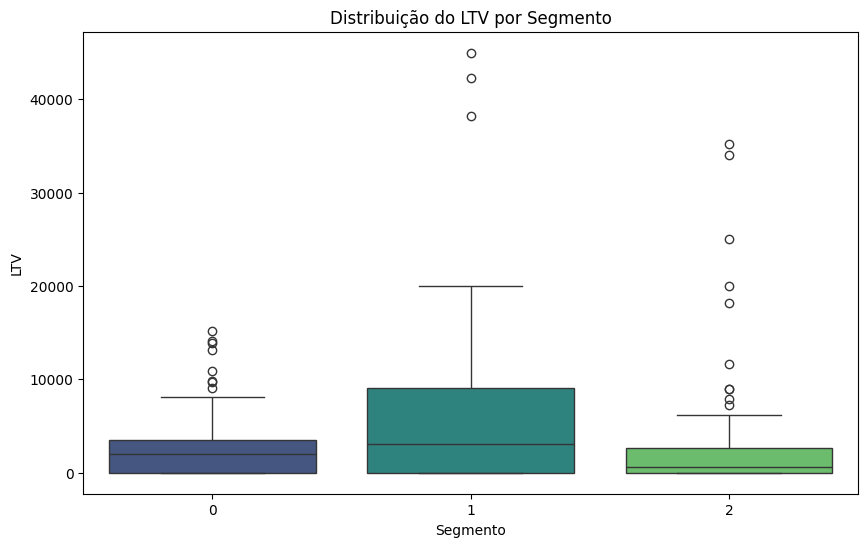

In [32]:
# Visualizar Oportunidades de Crescimento e Resultados
# Objetivo: Exibir insights de forma clara para orientar decisões de negócios.
# Ferramentas: matplotlib, seaborn para gráficos e relatórios.

# Gráfico para visualizar o LTV por segmento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segmento', y='LTV', data=data, palette='viridis',legend=False)
plt.title('Distribuição do LTV por Segmento')
plt.xlabel('Segmento')
plt.ylabel('LTV')
plt.show()